Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.
A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.
Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 


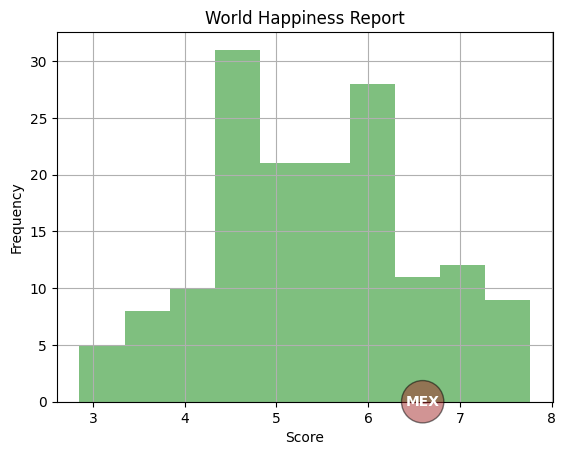

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

happiness = pd.read_csv('Happiness_report.csv')

mexico = (
    pd.read_csv('Happiness_report.csv')
    .query("`Country or region` == 'Mexico'")
    .T
)
mexico.columns = ['Mexico']

mex_score = happiness.loc[happiness['Country or region'] == 'Mexico', 'Score'].to_list()[0]
mex_y = 0

happiness['Score'].hist(color = 'green', alpha = 0.5)
plt.title("World Happiness Report")
plt.xlabel("Score")
plt.ylabel("Frequency")

# Texto dentro del círculo
plt.annotate('MEX',
             xy=(mex_score, mex_y),
             xytext=(mex_score, mex_y),
              ha='center',
             va='center',
             color='white',
             weight='bold',
             bbox=dict(boxstyle='circle,pad=0.3', facecolor='brown', alpha=0.5),
             clip_on=False)
# Mostrar gráfico
plt.show()

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación. 

C:\Users\ernes\AppData\Local\Temp\ipykernel_23228\3829713429.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels = ['Healthy life expectancy'])


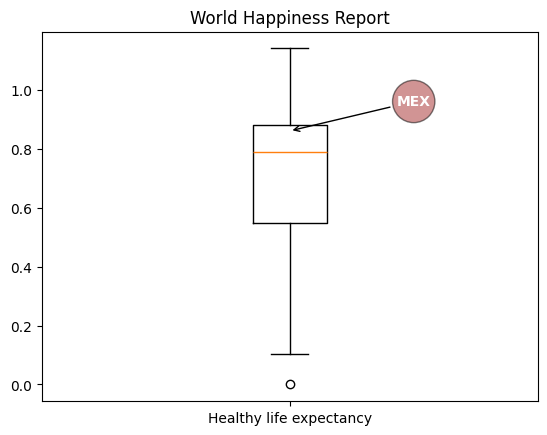

In [64]:
mex_hle = happiness.loc[happiness['Country or region'] == 'Mexico', 'Healthy life expectancy'].to_list()[0]
mex_y = mex_hle

plt.boxplot(happiness['Healthy life expectancy'].dropna(), labels = ['Healthy life expectancy'])
plt.title('World Happiness Report')
plt.annotate('MEX',
             xy=(1, mex_y),
             xytext=(1.25, mex_y + 0.1),
             ha='center',
             va='center',
             color='white',
             weight='bold',
             arrowprops=dict(arrowstyle='->', color='black'),
             bbox=dict(boxstyle='circle,pad=0.3', facecolor='brown', alpha=0.5),
             clip_on=False
        )

plt.show()

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

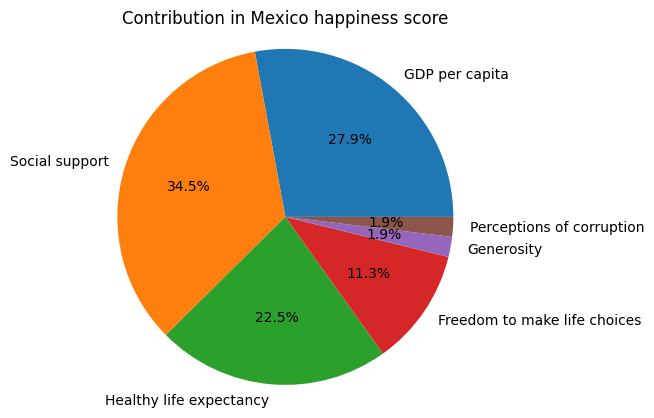

In [131]:
df = mexico.T
df.drop(['Overall rank', 'Country or region', 'Score'], axis = 1, inplace = True)
df = df.T
df.columns = ['Factors']


plt.pie(df['Factors'], labels=df.index, autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness score')
plt.axis('equal')  # Para que sea circular
plt.show()

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

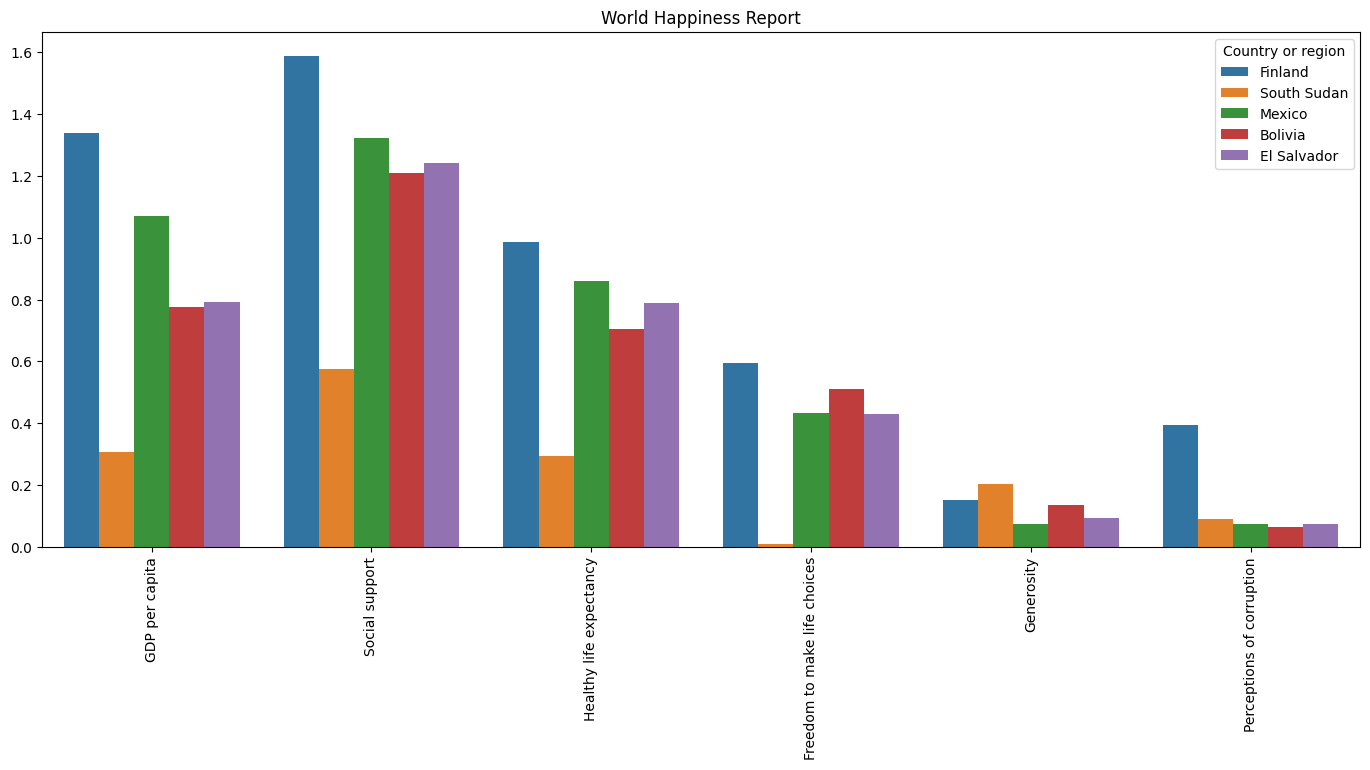

In [207]:
# Elimina duplicados para evitar que max/min se repitan con randoms
df = happiness.drop_duplicates(subset='Country or region')
# Obtener máximo y mínimo
df_max = df[df['Score'] == df['Score'].max()]
df_min = df[df['Score'] == df['Score'].min()]
# Excluir esos dos para seleccionar aleatorios
df_others = df[~df['Country or region'].isin(df_max['Country or region']) &  ~df['Country or region'].isin(df_min['Country or region'])]
# Elegir 3 filas aleatorias del resto
df_random = df_others.sample(n=2, random_state=1)
#Obteniendo el de mexico
df_mex = df.loc[df['Country or region'] == 'Mexico']
# Unir todo en un nuevo DataFrame
df_result = pd.concat([df_max, df_min, df_mex, df_random], ignore_index=True)

df_result.drop(['Overall rank', 'Score'], axis = 1, inplace = True)

df_melted = df_result.melt(id_vars='Country or region', 
                    value_vars=['GDP per capita', 'Social support', 'Healthy life expectancy',
                                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
                    var_name='Factor', value_name='Value')

# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Factor', y='Value', hue='Country or region')
plt.title('World Happiness Report')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.show()

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

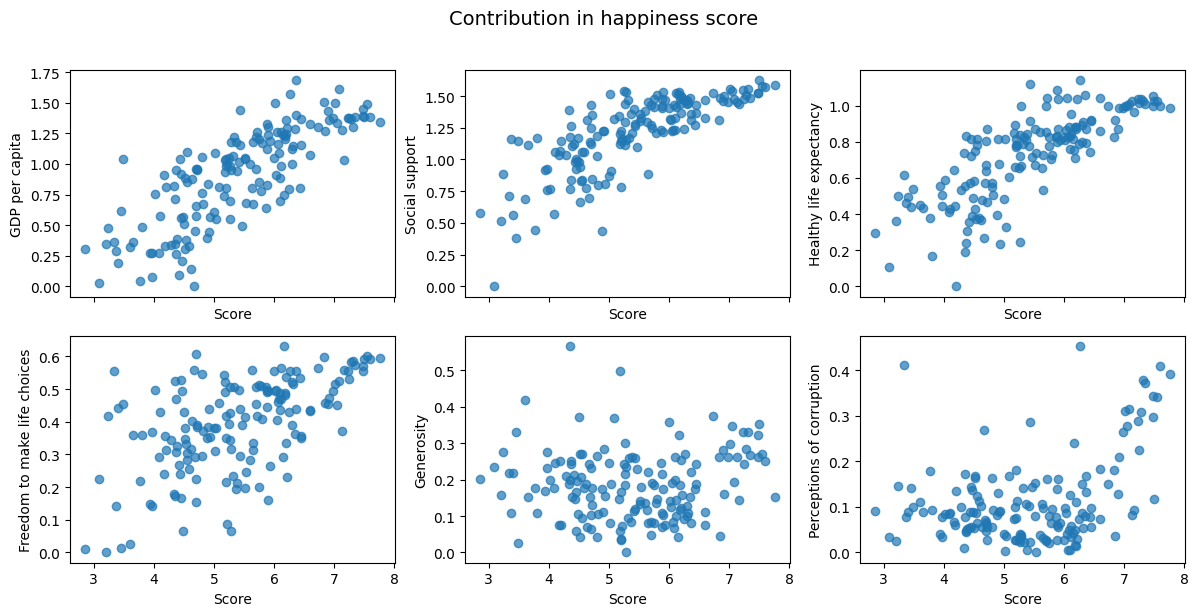

In [229]:
# Transformamos a formato largo (long-form)
df_melted = happiness.melt(id_vars='Score', 
                    value_vars=['GDP per capita', 'Social support',
                                'Healthy life expectancy', 'Freedom to make life choices',
                                'Generosity', 'Perceptions of corruption'],
                    var_name='Factor',
                    value_name='Value')

# Lista de factores que quieres graficar (columnas del DataFrame)
columns = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True)

# Aplanar los ejes para iterarlos fácilmente, cambiando de (2,3) a (6,)
axes = axes.flatten()

# Graficar cada factor contra 'Score'
for i, col in enumerate(columns):
    ax = axes[i]
    ax.scatter(df['Score'], df[col], alpha=0.7)
    ax.set_xlabel('Score')
    ax.set_ylabel(col)

# Título general
fig.suptitle("Contribution in happiness score", fontsize=14, y=1.02)

plt.tight_layout()
plt.show()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

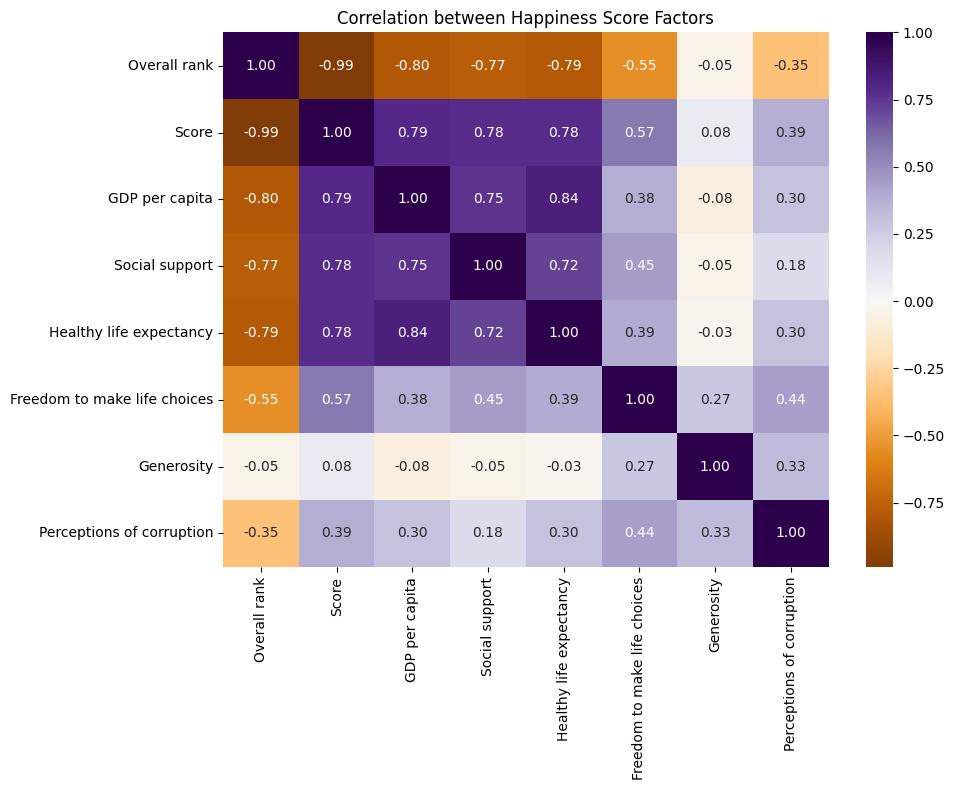

In [236]:
# Seleccionar columnas relevantes (incluyendo Overall rank)
cols = ['Overall rank', 'Score','GDP per capita', 'Social support', 
        'Healthy life expectancy', 'Freedom to make life choices', 
        'Generosity', 'Perceptions of corruption']

# Calcular la matriz de correlación
corr = df[cols].corr()

# Crear el heatmap con los valores
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PuOr", center=0)

plt.title("Correlation between Happiness Score Factors")
plt.tight_layout()
plt.show()


Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región. 

C:\Users\ernes\AppData\Local\Temp\ipykernel_23228\811378963.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_new, x='Region', y='Score', ci=None, palette = "Set2")
C:\Users\ernes\AppData\Local\Temp\ipykernel_23228\811378963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new, x='Region', y='Score', ci=None, palette = "Set2")


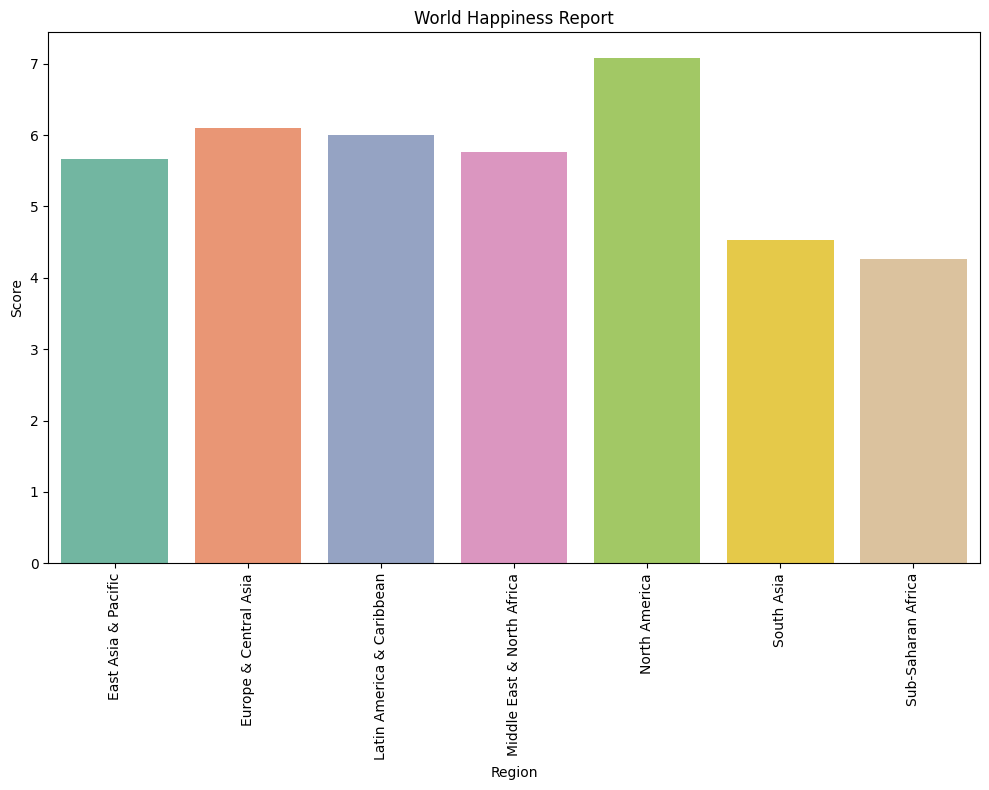

In [259]:
metadata = pd.read_csv('MetadataEvaluacion.csv')
metadata = metadata.rename(columns = {'TableName':'Country or region'})

df_new = happiness.merge(metadata, on = 'Country or region')

df_new = df_new[['Region', 'Score']].groupby(['Region']).mean()

plt.figure(figsize=(10, 8))
sns.barplot(data=df_new, x='Region', y='Score', ci=None, palette = "Set2")
plt.title('World Happiness Report')
plt.xticks(rotation=90)  # Para que las etiquetas no se encimen
plt.tight_layout()
plt.show()